# 自我訓練(Self-training)測試

## 載入相關套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

## 載入資料集

In [2]:
X, y = datasets.load_iris(return_X_y=True)
X = X[:, :2]

## 資料分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 設定 30% 資料為沒有標註(-1)

In [4]:
rng = np.random.RandomState(0)
y_rand = rng.rand(y_train.shape[0])
y_30 = np.copy(y_train)
y_30[y_rand < 0.3] = -1
np.count_nonzero(y_30==-1)

38

In [5]:
y_30_index = np.where(y_30==-1)[0]
y_30_index

array([ 14,  15,  16,  24,  26,  30,  34,  43,  46,  47,  53,  54,  55,
        57,  59,  60,  61,  63,  64,  67,  69,  75,  76,  77,  78,  79,
        82,  85,  87,  92,  94,  95,  97,  99, 101, 104, 108, 113],
      dtype=int64)

In [6]:
type(y_30_index)

numpy.ndarray

## 模型訓練

In [7]:
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
clf = SelfTrainingClassifier(base_classifier).fit(X_train, y_30)

## 繪製決策邊界

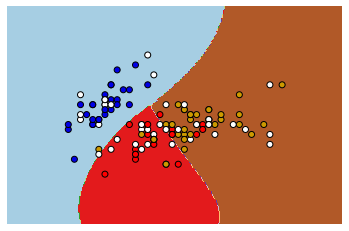

In [8]:
# 建立 mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 每個標籤不同顏色(RGB)
color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 繪製等高線
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("off")

# 繪製實際點
colors = [color_map[y] for y in y_30]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolors="black")

## SVM 模型評估

In [9]:
base_classifier.fit(X_train, y_30)
base_classifier.score(X_test, y_test)

0.6666666666666666

## Self-training 模型評估

In [10]:
clf.score(X_test, y_test)

0.7666666666666667

## 完整資料進行模型評估

In [14]:
rng = np.random.RandomState(42)
X, y = datasets.load_iris(return_X_y=True)
random_unlabeled_points = rng.rand(y.shape[0]) < 0.3
y[random_unlabeled_points] = -1

svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(X, y)

SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))

In [15]:
svc.fit(X[y >= 0], y[y >= 0])
svc.score(X, y)

0.66

In [16]:
X, y = datasets.load_iris(return_X_y=True)
self_training_model.score(X, y)

0.9733333333333334